In [2]:
import pandas as pd
import numpy as np
import seaborn as sb

In [3]:
df_cust=pd.read_csv('marketing_customer_analysis.csv')
df_cust.head(2)

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN


In [4]:
# 1. Show the dataframe shape
df_cust.shape

(10910, 26)

In [5]:
# 2. Standardize header names
df_cust.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [6]:
df_cust.columns=df_cust.columns.str.lower().str.replace(' ', '_').str.replace(':', '')
df_cust.columns

Index(['unnamed_0', 'customer', 'state', 'customer_lifetime_value', 'response',
       'coverage', 'education', 'effective_to_date', 'employmentstatus',
       'gender', 'income', 'location_code', 'marital_status',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type'],
      dtype='object')

In [7]:
# 3. Which columns are numerical?
df_cust.dtypes

unnamed_0                          int64
customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size    

In [8]:
# These are the numerical columns

df_cust.select_dtypes(include=np.number).columns.tolist()

['unnamed_0',
 'customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

In [9]:
# 4. Which columns are categorical?

df_cust.select_dtypes(include=np.object).columns.tolist()

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type']

In [10]:
# 5. Check and deal with NaN values.
pd.set_option('display.max_columns', 500)

df_cust.isna().sum()

df_cust[df_cust['state'].isna()]



,unnamed_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
5,5,HO81102,NaN,4745.181764,NaN,Basic,High School or Below,2/14/11,Employed,M,50549,Suburban,Divorced,61,2.0,73,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A
11,11,GE63585,NaN,2420.711888,NaN,Basic,Bachelor,2/7/11,Employed,M,31710,Urban,Divorced,62,5.0,29,0.0,1,Corporate Auto,Corporate L3,Offer1,Call Center,199.551735,Two-Door Car,Medsize,NaN
58,58,BR69566,NaN,14019.833140,NaN,Basic,College,2/18/11,Employed,M,31739,Suburban,Divorced,71,10.0,29,0.0,2,Personal Auto,Personal L3,Offer4,Call Center,469.882367,Two-Door Car,Small,NaN
62,62,UF44021,NaN,2108.493744,NaN,Basic,Bachelor,1/2/11,Unemployed,M,0,Suburban,Single,61,8.0,91,0.0,1,Personal Auto,Personal L2,Offer1,Agent,351.856810,Two-Door Car,Medsize,NaN
126,126,TE60343,NaN,4716.264294,NaN,Basic,High School or Below,2/25/11,Employed,M,25746,Suburban,Married,61,0.0,84,1.0,3,Corporate Auto,Corporate L3,Offer2,Agent,292.800000,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,10837,IJ40048,NaN,4978.950257,NaN,Basic,Bachelor,1/31/11,Employed,M,28695,Urban,Single,64,17.0,87,0.0,4,Corporate Auto,Corporate L2,Offer1,Branch,221.241837,Four-Door Car,Medsize,A
10849,10849,SO38188,NaN,5308.617246,NaN,Extended,Bachelor,1/24/11,Employed,M,40178,Suburban,Married,136,7.0,13,0.0,1,Special Auto,Special L2,Offer1,Agent,652.800000,SUV,Medsize,NaN
10874,10874,PD52748,NaN,10036.536340,NaN,Extended,High School or Below,2/12/11,Unemployed,F,0,Suburban,Single,134,15.0,92,1.0,8,Personal Auto,Personal L3,Offer1,Call Center,1353.289060,SUV,Medsize,NaN
10894,10894,EX63393,NaN,6314.492009,NaN,Extended,Master,2/27/11,Employed,F,66947,Suburban,Married,78,13.0,12,0.0,6,Personal Auto,Personal L1,Offer3,Agent,374.400000,Four-Door Car,Small,NaN


In [11]:
# 5.1. First of all we are going to delete the rows with more than one value that is not a number as we will consider 
# that this observation is not reliable

df_cust.dropna(thresh=len(df_cust.columns)-1,inplace=True) 
df_cust.shape

(9134, 26)

In [12]:
# 5.2. We are going to remove all the rows with no value in the columns which show similar amount of Nan values and that are similar
# categories.

df_cust.dropna(how='any',subset=['state', 'response','months_since_last_claim','number_of_open_complaints','vehicle_class','vehicle_size'], inplace=True)

In [13]:
#5.3. We are going to remove the 'vehicle type' column as about the half of the rows have Nan values
df_cust=df_cust.iloc[:,:25]
df_cust.columns

Index(['unnamed_0', 'customer', 'state', 'customer_lifetime_value', 'response',
       'coverage', 'education', 'effective_to_date', 'employmentstatus',
       'gender', 'income', 'location_code', 'marital_status',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [14]:
# 6. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show 
#only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, 
#consider only January and February.

In [18]:
from datetime import datetime

# We are going to provide the date format to the dates.
df_cust['effective_to_date']=pd.to_datetime(df_cust['effective_to_date'],format="%m/%d/%Y")

# Now we are going to extract the month to another column.

df_cust['month'] = pd.DatetimeIndex(df_cust['effective_to_date']).month

In [19]:
df_cust.dtypes

unnamed_0                                 int64
customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                        

In [20]:
# Now we will generate a definitive dataframe just including the observations from January and February 
# (as there is none from March)
df_cust=df_cust[(df_cust['month']==1)|(df_cust['month']==2)|(df_cust['month']==3)]
df_cust['month'].value_counts()

1    4898
2    4236
Name: month, dtype: int64

In [21]:
# 7. BONUS: Put all the previously mentioned data transformations into a function.

## Here starts the Customer_anlalysis_round3_lab

In [22]:
import matplotlib.pyplot as plt

In [23]:
# 1. Show DataFrame info.
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed_0                      9134 non-null   int64         
 1   customer                       9134 non-null   object        
 2   state                          9134 non-null   object        
 3   customer_lifetime_value        9134 non-null   float64       
 4   response                       9134 non-null   object        
 5   coverage                       9134 non-null   object        
 6   education                      9134 non-null   object        
 7   effective_to_date              9134 non-null   datetime64[ns]
 8   employmentstatus               9134 non-null   object        
 9   gender                         9134 non-null   object        
 10  income                         9134 non-null   int64         
 11  location_code   

In [24]:
# 2. Describe DataFrame
df_cust.describe()

,unnamed_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,5490.357675,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,3148.183236,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,2764.250000,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5508.500000,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8218.750000,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,10908.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


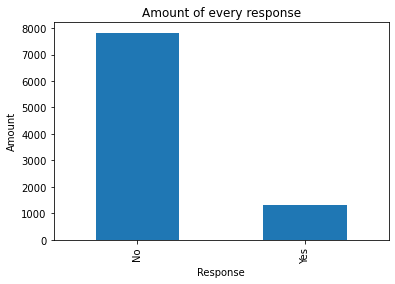

In [25]:
# 3. Show a plot of the total number of responses
df_cust['response'].value_counts().plot(kind='bar')
plt.xlabel('Response')
plt.ylabel('Amount')
plt.title('Amount of every response');


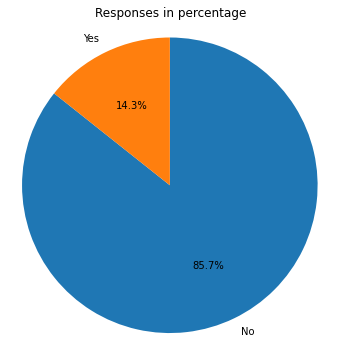

In [26]:
# As a percentage in pie chart

count_response=df_cust['response'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(count_response, labels = count_response.index, autopct='%.1f%%', startangle = 90, counterclock = False);
plt.axis('square')
plt.title('Responses in percentage');

In [27]:
# 4. Show a plot of the response rate by the sales channel
df_cust['sales_channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

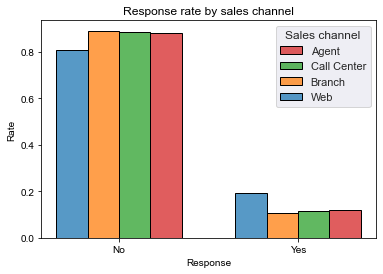

In [28]:
ay = sb.histplot(x = df_cust['response'], hue=df_cust['sales_channel'], multiple="dodge", 
                  stat = 'density', shrink = 0.7, common_norm=False)
# With "common_norm = False" we achieve that the normalized values by sales channels sum up 1, otherwise the values would be 
# calculated taking into account all the responses. However, we are interested in knowing the normalized values by sales channel
# in order to be able to compare the results between the different sales channels hence normalizing each histogram independently.

sb.set(rc={'figure.figsize':(18,7)})
plt.xlabel('Response')
plt.ylabel('Rate')
plt.legend(title='Sales channel', loc='upper right', labels=['Agent','Call Center','Branch','Web'])
plt.title('Response rate by sales channel');
plt.show()

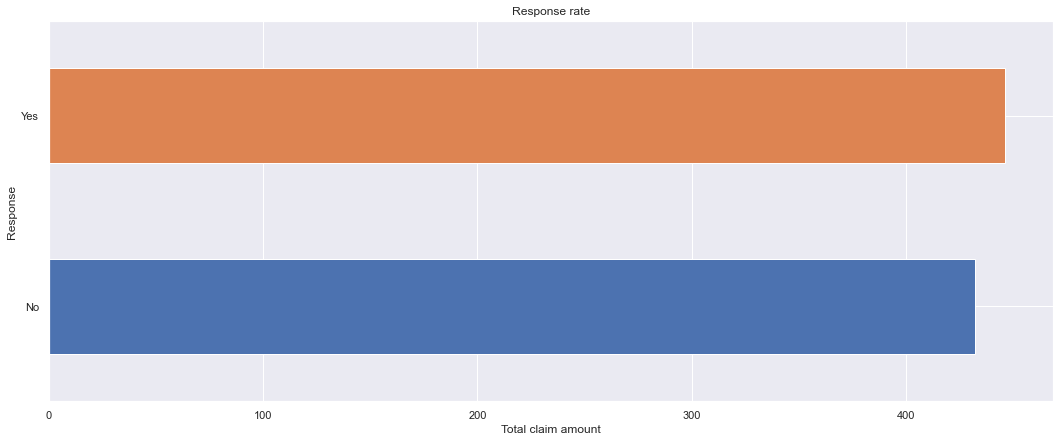

In [29]:
# 5. Show a plot of the response rate by the total claim amount. Here we will do an histogram with bins
no_yes=df_cust.groupby('response')['total_claim_amount'].mean()
no_yes.plot.barh(color=['C0', 'C1'])
plt.xlabel('Total claim amount')
plt.ylabel('Response')
plt.title('Response rate');
plt.show()

# Below we are plotting the amount of total claims for every type of response,hence the amount of claims for every "yes" response
# and for every "no" response.

In [30]:
# 6. Show a plot of the response rate by income
df_cust['income'].max(), df_cust['income'].min() # to know the minimum and maximum incomes.


(99981, 0)

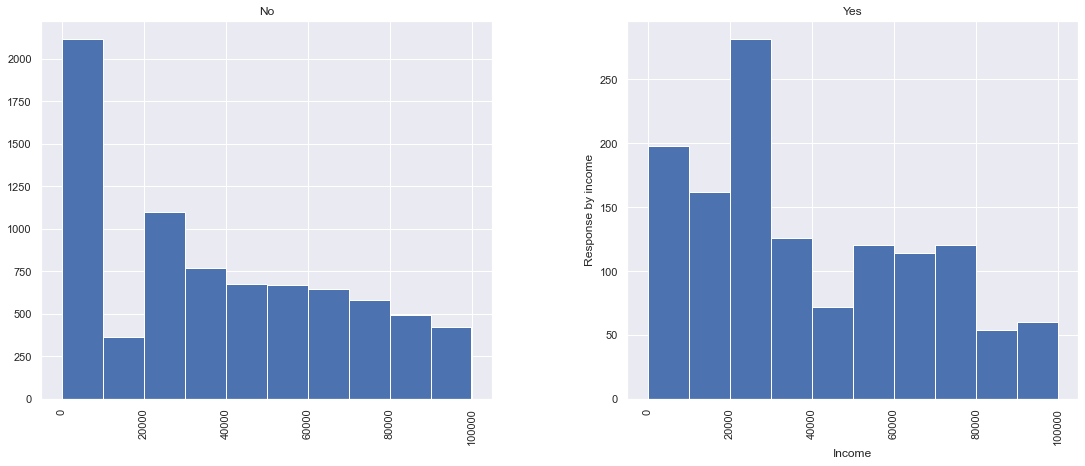

In [31]:
# In the following histograms it is possible to visualize how many "yes" and "no" responses are given by income within
# 10,000$ bins.

df_cust['income'].hist(by=df_cust['response'])
plt.xlabel('Income')
plt.ylabel('Response by income')
plt.show()